# Stage 2. EDA for files with percentage of households with Internet access
Step 1: loading and exploring files

Step 2: transforming both data frames in the same view by rearranging, renaming and sorting

Step 3: combining both data frames in 1

Step 4: Applying 2 methonds to fill missing values

In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

##### Step 1

In [3]:
#loading 1st file and displaynig first 5 rows
df_ica1 = pd.read_csv("ICA29.csv")
df_ica1.head()

,Region,Year,Statistic Label,UNIT,VALUE
0,State,2007,Households with Computer,%,65.0
1,State,2007,Households with Computer Unweighted Sample,Number,4361.0
2,State,2007,Households with Computer connected to the Inte...,%,57.0
3,State,2007,Households with Computer connected to the Inte...,Number,4361.0
4,State,2008,Households with Computer,%,70.0


In [4]:
#checking nr of rows
df_ica1.shape

(360, 5)

In [5]:
#checking available years
df_ica1.Year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [7]:
# Loading 2nd file
df_ica2 = pd.read_csv("ICA172.csv")
df_ica2.head()

,STATISTIC Label,Year,NUTS 3 Region,UNIT,VALUE
0,Households with internet access,2022,State,%,94
1,Households with internet access,2022,Border,%,90
2,Households with internet access,2022,Midland,%,93
3,Households with internet access,2022,West,%,91
4,Households with internet access,2022,Dublin,%,97


In [8]:
#checking nr of rows
df_ica2.shape

(27, 5)

In [9]:
#checking available years

df_ica2.Year.unique()

array([2022, 2021, 2020], dtype=int64)

In [10]:
#re-order columns 
df_ica1 = df_ica1[['Statistic Label','Year','Region','UNIT','VALUE']]
df_ica1.head()

,Statistic Label,Year,Region,UNIT,VALUE
0,Households with Computer,2007,State,%,65.0
1,Households with Computer Unweighted Sample,2007,State,Number,4361.0
2,Households with Computer connected to the Inte...,2007,State,%,57.0
3,Households with Computer connected to the Inte...,2007,State,Number,4361.0
4,Households with Computer,2008,State,%,70.0


In [11]:
#removin excessive rows
df_ica1 = df_ica1.drop(df_ica1[(df_ica1["Statistic Label"] != "Households with Computer connected to the Internet")].index)

In [12]:
# checking nr of rows
df_ica1.shape

(90, 5)

**Observation**

data frame df_ica1 has some excessive irrelevant data that was removed

columns were rearranged to have same order in both data frames

In [13]:
#renaming columns in 2nd data frame to have same view as in the 1st one to smoth concatination
df_ica2 = df_ica2.rename(columns={'STATISTIC Label': 'Statistic Label'})
df_ica2 = df_ica2.rename(columns={'NUTS 3 Region': 'Region'})

In [14]:
# combining both data frames
df_ica = pd.concat([df_ica1, df_ica2], ignore_index=True)
df_ica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  117 non-null    object 
 1   Year             117 non-null    int64  
 2   Region           117 non-null    object 
 3   UNIT             117 non-null    object 
 4   VALUE            117 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [15]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_ica = df_ica.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_ica = df_ica.reset_index(drop=True)

In [18]:
#checking that all years are here 
df_ica.Year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2020,
       2021, 2022], dtype=int64)

In [19]:
# In column 'Region' replacing value 'State' with 'Ireland' and 'Midland' with 'Midlands'
df_ica = df_ica.replace('State', 'Ireland')

In [20]:
df_ica = df_ica.replace('Midland', 'Midlands')

In [21]:
#getting final view for VALUE column
df_ica.rename(columns={'VALUE': '% Households with Internet Access'}, inplace=True)

In [35]:
#getting resultng data frame that will be used in the future and displaying it
df = pd.DataFrame(df_ica, columns=['Year', 'Region', '% Households with Internet Access'])
df.head()

,Year,Region,% Households with Internet Access
0,2007,Ireland,57.0
1,2007,Dublin,66.0
2,2007,Midlands,54.0
3,2007,South-West,56.0
4,2007,Border,43.0


In [24]:
# Plotting resulting data frame to see dependency between year and % of Households with Internet Access per each region

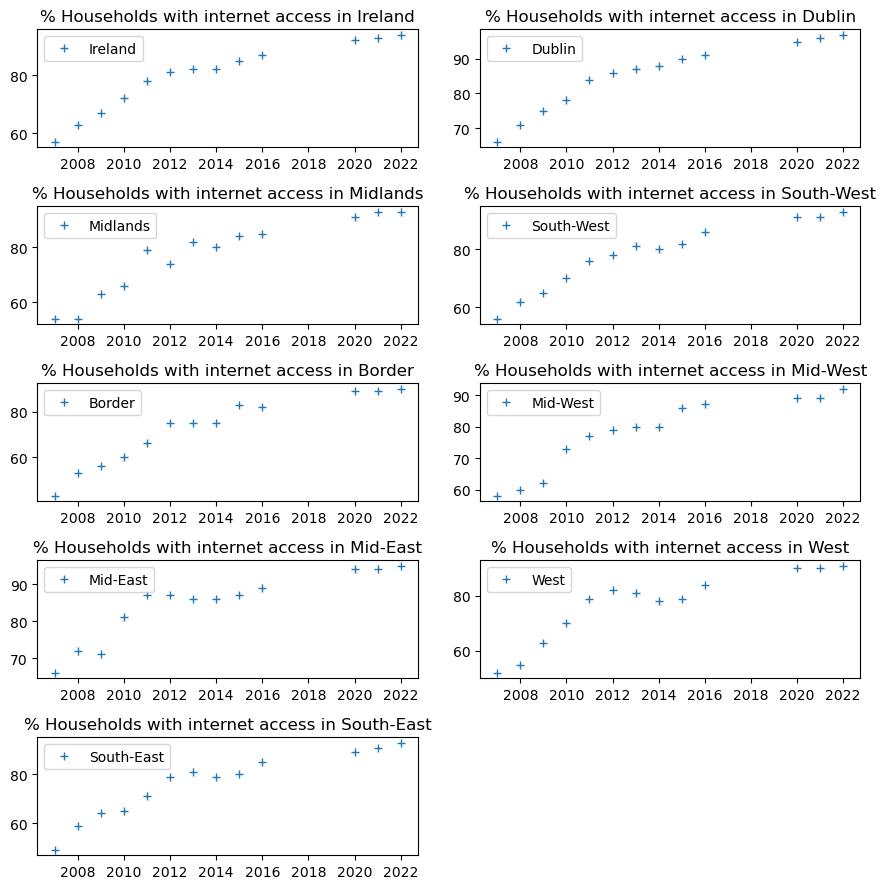

In [27]:
from matplotlib.gridspec import GridSpec

# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(9, 9))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df[df['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['% Households with Internet Access'], '+', label=region)
    ax.legend()
    ax.set_title(f'% Households with internet access in {region}')

# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

**Observation**

It's clear that data have linear dependency. 

Missing data are clearly visible on the graps

In [36]:
# loading resulting data to csv file in order to access this data frame easier 
df.to_csv("ICA_m.csv", index = False)

# 1 method to address the missing data - Normal distribution

In [38]:
#Applying 1st method 
df_f = pd.read_csv("ICA_m.csv")
df_f.head()

,Year,Region,% Households with Internet Access
0,2007,Ireland,57.0
1,2007,Dublin,66.0
2,2007,Midlands,54.0
3,2007,South-West,56.0
4,2007,Border,43.0


In [39]:
# displaying available years
df_f.Year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2020,
       2021, 2022], dtype=int64)

In [41]:
#creating list with missing years
years = [2017, 2018, 2019]

#creating list with unique region names
unique_region_names = set(df['Region'])

In [42]:
# importing normal distribution method
from scipy.stats import norm

data=[]
#creating 2 loops for each of missing year and unique region
for year in years:
    for region in unique_region_names:        
        df_reg = df_f.drop(df_f[(df_f["Region"] != region) ].index)
        
        #finding mean and std values
        mean = df_reg['% Households with Internet Access'].mean()
        std = df_reg['% Households with Internet Access'].std()
        
        # calculating normal distribution based on found values of mean and standard deviation
        normal_distribution = norm(loc=mean, scale=std)
        # assigns it a value from a normal distribution with mean 0 and standard deviation 1
        imputed_population = normal_distribution.rvs()
        
        # row by row saving data in data frame
        row = [year, region, imputed_population]
        data.append(row)
df_norm = pd.DataFrame(data, columns=['Year', 'Region','% Households with Internet Access'])

In [43]:
# checkin our values
df_norm.describe()

,Year,% Households with Internet Access
count,27.00000,27.000000
mean,2018.00000,76.499265
std,0.83205,12.605213
min,2017.00000,38.915807
25%,2017.00000,68.193756
50%,2018.00000,76.849312
75%,2019.00000,86.165587
max,2019.00000,94.852727


In [44]:
#combining missing values with main dataframe
df_final = pd.concat([df_f, df_norm], ignore_index=True)

In [45]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_final = df_final.sort_values(by=['Year','Region'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_final = df_final.reset_index(drop=True)

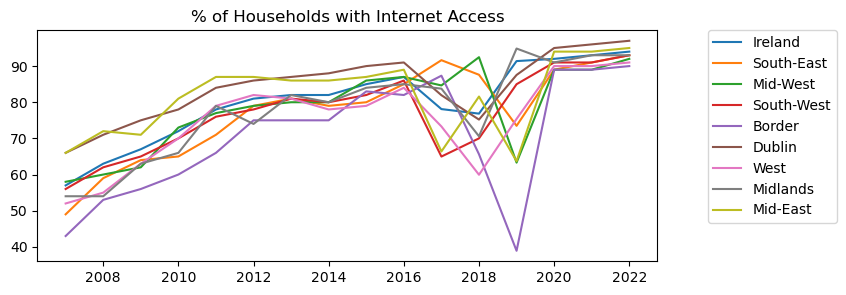

In [46]:
#Visualising resulting data frame
plt.figure(figsize=(8, 3))
for region in unique_region_names:
    df_region = df_final[df_final['Region'] == region]
    plt.plot(df_region['Year'], df_region['% Households with Internet Access'], label=region)
    plt.title('% of Households with Internet Access')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))

**Observation**

Graph clearly shows that data weren't normaly distributed, so this method can't be aaplied to fill empty values

# 2 method to address the missing data - Interpolating NAs

In [69]:
#loading our data
df_ica = pd.read_csv("ICA_m.csv")
df_ica.head()

,Year,Region,% Households with Internet Access
0,2007,Ireland,57.0
1,2007,Dublin,66.0
2,2007,Midlands,54.0
3,2007,South-West,56.0
4,2007,Border,43.0


In [70]:
# Create a set to store the unique names of the regions
region_names = set()

# Iterate over the data frame and add each region name to the set
for region in df_ica['Region']:
    region_names.add(region)

# Convert the set to a list
unique_region_names = list(region_names)

In [71]:
#creating list with missing years

years_to_interpolate = [2017, 2018, 2019]

# Create a list of lists, where each sublist contains the values for a single row in the new data frame
data = []
for year in years_to_interpolate:
    for region in unique_region_names:
        row = [year, region, np.nan]
        data.append(row)

In [72]:
# creating data frame with missing values
df = pd.DataFrame(data, columns=['Year', 'Region', '% Households with Internet Access'])

In [73]:
#combining it with main data frame
df_ica = pd.concat([df_ica, df], ignore_index=True)

In [74]:
# cheching null values
df_ica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               144 non-null    int64  
 1   Region                             144 non-null    object 
 2   % Households with Internet Access  117 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB


In [75]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_ica = df_ica.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_ica = df_ica.reset_index(drop=True)

In [76]:
# Group the DataFrame by region
grouped_dataframe = df_ica.groupby("Region")

# Interpolate the missing values in each region
interpolated_dataframe = grouped_dataframe.apply(lambda group: group.interpolate(method="linear", axis=0))

# Ungroup the DataFrame
interpolated_dataframe = interpolated_dataframe.reset_index(drop=True)


In [77]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_ica = interpolated_dataframe.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_ica = df_ica.reset_index(drop=True)

In [78]:
df_ica.head()

,Year,Region,% Households with Internet Access
0,2007,Border,43.0
1,2007,Mid-West,58.0
2,2007,Midlands,54.0
3,2007,Mid-East,66.0
4,2007,South-East,49.0


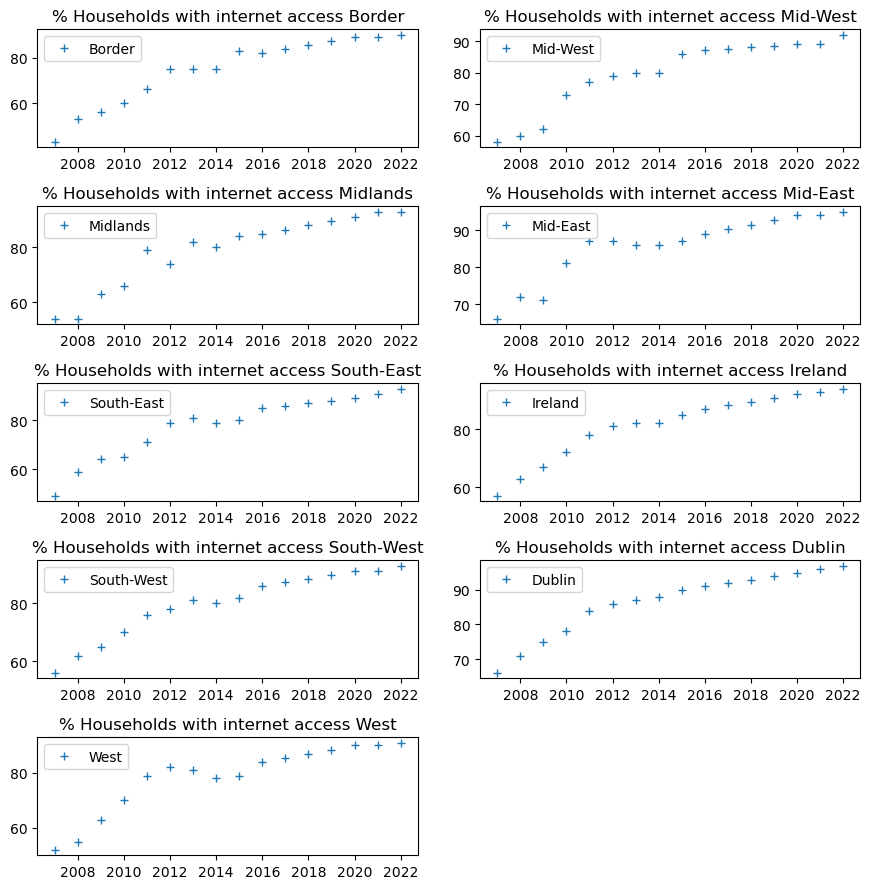

In [79]:
# Visualising resulting data for each region
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(9, 9))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_ica['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_ica['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_ica[df_ica['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['% Households with Internet Access'], '+', label=region)
    ax.legend()
    ax.set_title(f'% Households with internet access {region}')
    ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

In [80]:
df.to_csv("ICA_c.csv", index = False)